In [3]:
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.wrappers.scikit_learn import (
    KerasClassifier, KerasRegressor
)
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from honest_ml.trainer import (
    RegressionTrainer, ClassificationTrainer, EvaluateModel
)
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np

def create_model():
    model = Sequential()
    model.add(Dense(30, input_dim=100, activation="relu"))
    model.add(Dense(15, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    
    model.compile(
        loss='binary_crossentropy',
        optimizer="adam",
        metrics=["accuracy"]
    )
    return model

clf = KerasClassifier(
    build_fn=create_model,
    epochs=5,
    batch_size=32,
    verbose=0
)

X, y = make_classification(
    n_samples=2000,  n_features=100,
    n_informative=90, n_redundant=2,
    random_state=0
)
X = pd.DataFrame(X)
y = pd.Series(y)
num_trials = 200

clf_eval = EvaluateModel("classification", clf, X, y, num_trials)
model_instances = clf_eval.fit_random("random")

In [4]:
from honest_ml.visualizer import Visualizer

viz = Visualizer(
    model_instances, "classification", 
    coef_names=X.columns.tolist()
)

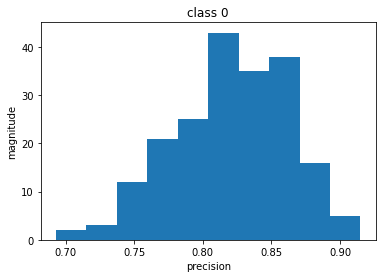

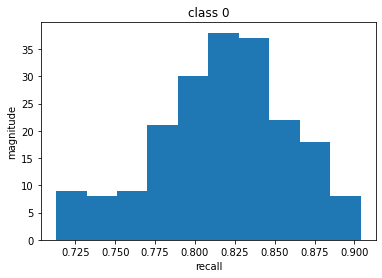

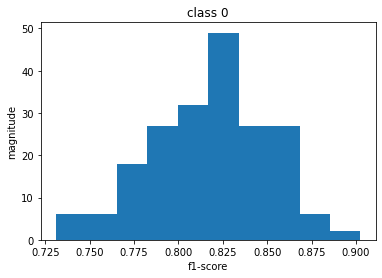

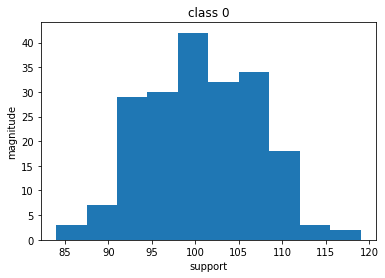

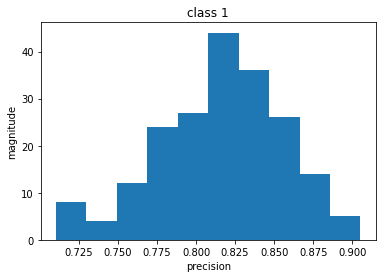

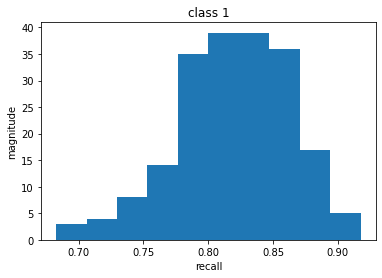

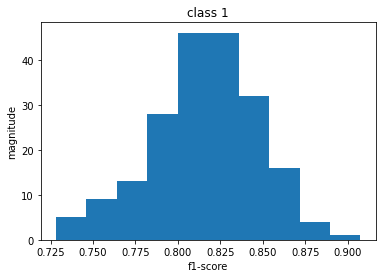

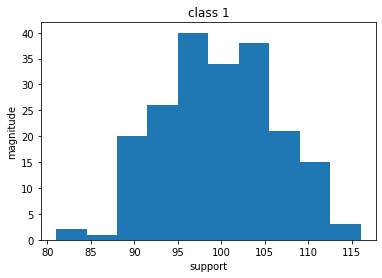

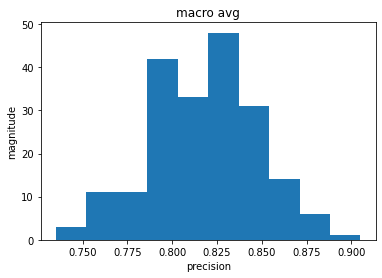

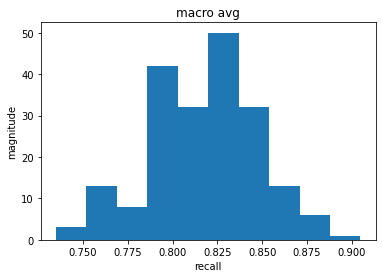

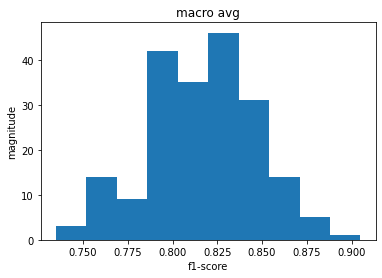

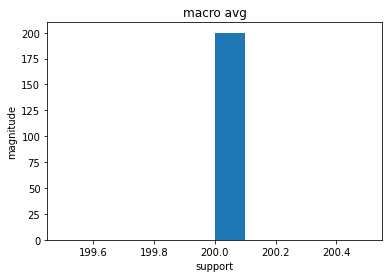

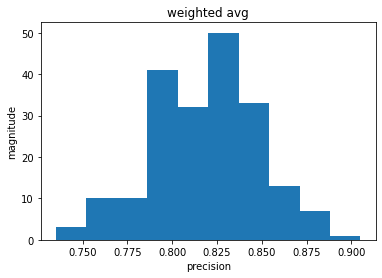

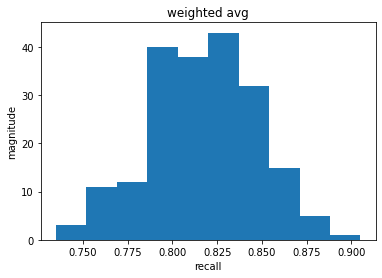

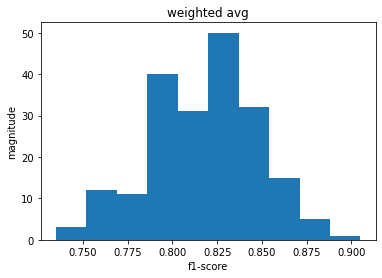

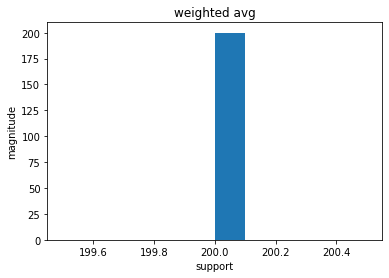

In [5]:
viz.visualize_classification()

In [8]:
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.wrappers.scikit_learn import (
    KerasClassifier, KerasRegressor
)
from tensorflow.keras import Sequential, metrics
from tensorflow.keras.layers import Dense
from honest_ml.trainer import (
    RegressionTrainer, ClassificationTrainer, EvaluateModel
)
from sklearn.datasets import make_classification
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np

def create_model():
    model = Sequential()
    model.add(Dense(30, input_dim=100, activation="relu"))
    model.add(Dense(15, activation="relu"))
    model.add(Dense(1, activation="linear"))
    
    model.compile(
        loss='mean_squared_error',
        optimizer="adam",
        metrics=[metrics.MeanSquaredError()]
    )
    return model

reg = KerasRegressor(
    build_fn=create_model,
    epochs=10,
    batch_size=32,
    verbose=0
)

X, y = make_regression(
    n_samples=2000,  n_features=100,
    n_informative=90,
    random_state=0
)
X = pd.DataFrame(X)
y = pd.Series(y)
num_trials = 200

clf_eval = EvaluateModel("regression", reg, X, y, num_trials)
model_instances = clf_eval.fit_random("random")

In [9]:
from honest_ml.visualizer import Visualizer

viz = Visualizer(
    model_instances, 
    "regression", 
    coef_names=X.columns.tolist()
)

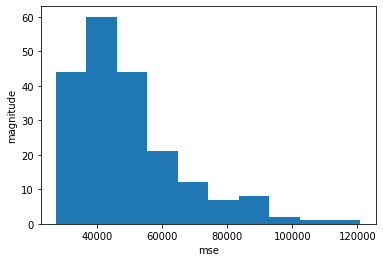

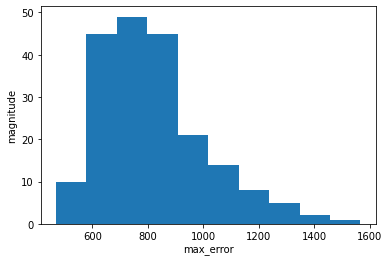

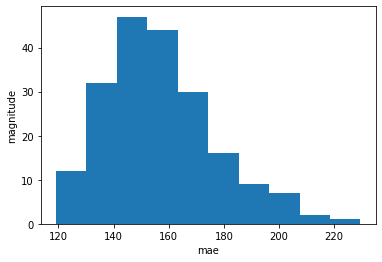

In [10]:
viz.visualize_regression()